## IMPORTACION LIBRERIAS

In [58]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [61]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier


## FASE 1. ANALISIS DE LOS DATOS

## 1. Visualización de los dataframe

Se realiza una revisión general de los dataframe a usar: 
- Contract
- Personal
- Phone
- Internet

In [62]:
contract = pd.read_csv('/datasets/contract.csv')
print(contract.head(10))

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
5  9305-CDSKC  2019-03-01  2019-11-01 00:00:00  Month-to-month   
6  1452-KIOVK  2018-04-01                   No  Month-to-month   
7  6713-OKOMC  2019-04-01                   No  Month-to-month   
8  7892-POOKP  2017-07-01  2019-11-01 00:00:00  Month-to-month   
9  6388-TABGU  2014-12-01                   No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed ch

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo no usar rutas absolutas en los notebooks ya que esto genera una dependecia específica en tu computador, es mejor dejarlo en rutas más sencilals cómo `/datasets/archivo.csv`
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Veo que esto se repite mucho a lo largo de tu notebook, tienes celdas markdown con este tipo de contenido sobre los dataframes que no es claro por que los estás mostrando. Te pediría revisar todo el notebook y corregir esta parte para mejorar presentación y orden
</div>

In [63]:

personal = pd.read_csv('/datasets/personal.csv')
print(personal.head())


   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


In [64]:
internet1 = pd.read_csv('internet1.csv')
print(internet1.head())
internet1.info()


   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   

In [65]:
phone = pd.read_csv('/datasets/phone.csv')
print(phone.head())

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


## 2. Revisión de los datos de cada dataframe

Revisión de datos nulos, tupos de datos y los posibles duplicados

In [66]:
dataframes = {
    "contract": contract,
    "personal": personal,
    "internet": internet1,
    "phone": phone
}

for name, df in dataframes.items():
    print(f"\n{'='*40}")
    print(f"DataFrame: {name}")
    display(df.head())
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    print("\nTipos de datos:")
    display(df.dtypes)
    print("\nValores nulos por columna:")
    display(df.isnull().sum())
    print("Duplicados:", df.duplicated().sum())


DataFrame: contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Filas: 7043, Columnas: 8

Tipos de datos:


customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


Valores nulos por columna:


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Duplicados: 0

DataFrame: personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Filas: 7043, Columnas: 5

Tipos de datos:


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object


Valores nulos por columna:


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Duplicados: 0

DataFrame: internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Filas: 5517, Columnas: 8

Tipos de datos:


customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object


Valores nulos por columna:


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Duplicados: 0

DataFrame: phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Filas: 6361, Columnas: 2

Tipos de datos:


customerID       object
MultipleLines    object
dtype: object


Valores nulos por columna:


customerID       0
MultipleLines    0
dtype: int64

Duplicados: 0


Algunas conclusiones de esta información
Datos en contract: 7043 (todos los clientes)
Datos en personal: 7043 (todos los clientes)
Datos en internet: 5517 (clientes con internet)
Datos en phone: 6361 (clientes con telefonía)

- No hay datos vacios en los dataframe ni duplicados, por lo que se tienen datos al menos completos.
- En contract: la columna TotalCharges es object y debería ser float (dado que son números que representan el total de pago)
- En la columna de EndDate, el valor "No" significa que no a cancelado, el que tiene la fecha, es precisamente la fecha de cancelación.
- Las columnas de fechas deben pasarse a datatime.
- Hay columnas en los dataframen que deben convertirse posteriormente a categóricos o binarios (los que tienen respuesta yes/no)

## 3. Análisis estadístico

Se revisa de cada dataframe un análisis estadístico y valores únicos. 

In [67]:
for name, df in dataframes.items():
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DEL DATAFRAME: {name.upper()}")
    print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
    print("-"*60)
    
    display(df.describe(include='all').T)
           
    print("\n Valores únicos por columna:")
    display(df.nunique().sort_values())


 ANÁLISIS DEL DATAFRAME: CONTRACT
Filas: 7043  |  Columnas: 8
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,1196-AMORA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeginDate,7043,77,2014-02-01,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,5,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043,6531,20.2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Valores únicos por columna:


PaperlessBilling       2
Type                   3
PaymentMethod          4
EndDate                5
BeginDate             77
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64


 ANÁLISIS DEL DATAFRAME: PERSONAL
Filas: 7043  |  Columnas: 5
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,1196-AMORA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Valores únicos por columna:


gender              2
SeniorCitizen       2
Partner             2
Dependents          2
customerID       7043
dtype: int64


 ANÁLISIS DEL DATAFRAME: INTERNET
Filas: 5517  |  Columnas: 8
------------------------------------------------------------


,count,unique,top,freq
customerID,5517,5517,5647-FXOTP,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785



 Valores únicos por columna:


InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
customerID          5517
dtype: int64


 ANÁLISIS DEL DATAFRAME: PHONE
Filas: 6361  |  Columnas: 2
------------------------------------------------------------


,count,unique,top,freq
customerID,6361,6361,1196-AMORA,1
MultipleLines,6361,2,No,3390



 Valores únicos por columna:


MultipleLines       2
customerID       6361
dtype: int64

Para resaltar, tenemos que:

Para columna Type hay 3 tipos de contrato (Month-to-month, One year, Two year)
Para la columna PaperlessBilling: 2 (Yes/No)
Para el PaymentMethod hay 4 métodos 
Para la fecha, EndDate hay 5 valores, donde la mayoría de clientes tienen No (clientes activos).
Para el columna MonthlyCharges tiene media 64.76, un min 18.25, un max 118.75. La mayoría de clientes tienen Month-to-month (3875 clientes lo manejan así)

Para contract, tenemos valores únicos en gender: 2 (Male/Female), SeniorCitizen: 0 o 1, Partner 2 (Yes/No), Dependents: 2 (Yes/No)

En InternetService: 2 tipos (DSL/Fiber optic, siendo Fiber optic el más solicitado)
Servicios opcionales (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV): la mayoría no los poseen.

Para Phone, MultipleLines: 2 valores (Yes/No) y la mayoría de clientes no las tienen (3390)

## FASE 2 ANALISIS EXPLORATORIO DE LOS DATOS

## 3.1 Creación de variable objetivo: 'cancel'

In [68]:
contract['EndDate'] = contract['EndDate'].astype(str).str.strip().str.capitalize()
contract['cancel'] = contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

print(contract['cancel'].value_counts())
print(contract['cancel'].value_counts(normalize=True))

0    5174
1    1869
Name: cancel, dtype: int64
0    0.73463
1    0.26537
Name: cancel, dtype: float64


In [69]:
contract['EndDate'].value_counts(dropna=False).head(20)

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

El 26% de los clientes del total analizado ha cancelado el servicio 
Existen 5174 clientes que siguen activos, y el rango de cancelación está entre Octubre 2019 y Enero 2020

## 3.2 Cambio y transformación de las variables fechas

Convertimos las variables a la forma datatime y pasamos las que dice 'no' a 'Not at Time'

In [70]:

contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

contract['EndDate'] = contract['EndDate'].replace('No', pd.NaT)
contract['EndDate'] = pd.to_datetime(contract['EndDate'])


Creamos una variable duración tiempo (para determinar la antiguedad del cliente)

In [71]:
today = pd.Timestamp.today()
contract['DurationDays'] = (contract['EndDate'].fillna(today) - contract['BeginDate']).dt.days

## 4 Gráficas de exploración

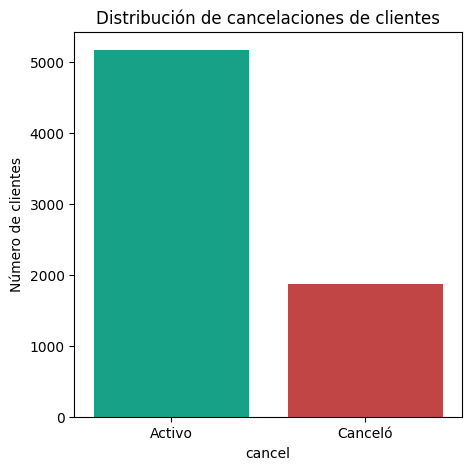

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(x='cancel', data=contract, palette=['#00b894','#d63031'])
plt.title('Distribución de cancelaciones de clientes')
plt.xticks([0,1], ['Activo', 'Canceló'])
plt.ylabel('Número de clientes')
plt.show()

La cancelación de los clientes está en una relación de 1 a 4 (representa el 26%)

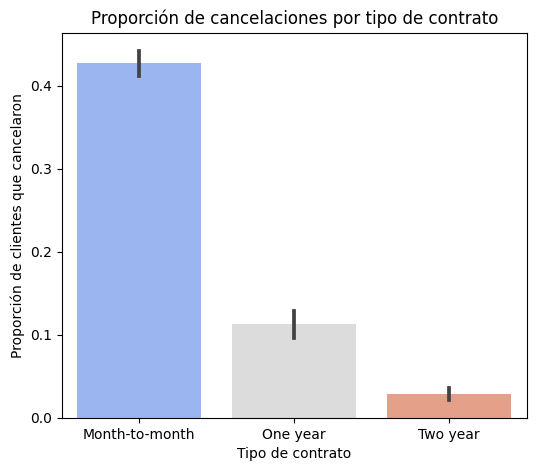

In [73]:

plt.figure(figsize=(6,5))
sns.barplot(x='Type', y='cancel', data=contract, palette='coolwarm')
plt.title('Proporción de cancelaciones por tipo de contrato')
plt.ylabel('Proporción de clientes que cancelaron')
plt.xlabel('Tipo de contrato')
plt.show()


Los clientes que más cancelan son los de "month to month", y esto es claro, porque al parecer los clientes no quieren comprometerse mucho con un plan ni con la compañía 40%. Lo clientes de contratos de 1 año están alrededor del 10%, mientras que los de 2 año están en menos del 5%. Estos clientes son los más fieles. 

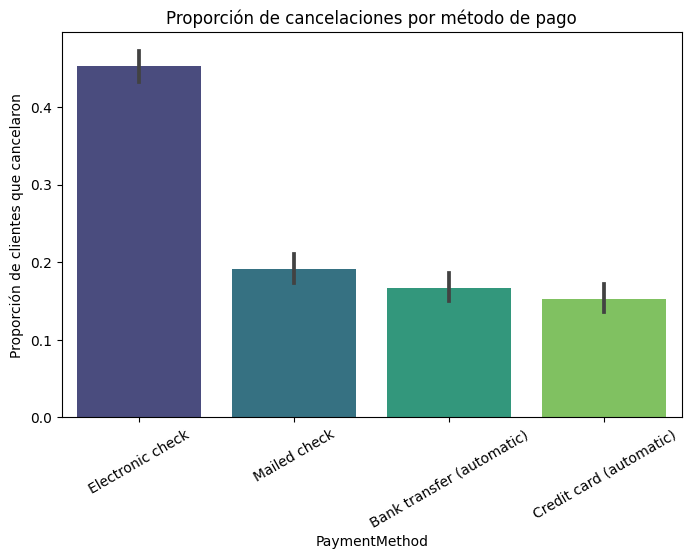

In [74]:
plt.figure(figsize=(8,5))
sns.barplot(x='PaymentMethod', y='cancel', data=contract, palette='viridis')
plt.title('Proporción de cancelaciones por método de pago')
plt.ylabel('Proporción de clientes que cancelaron')
plt.xticks(rotation=30)
plt.show()

Los clientes que más cancelan son los que pagan de manera electrónica (es decir, hay una mayor proabilidad que los que paguen por este método, cancelen) 

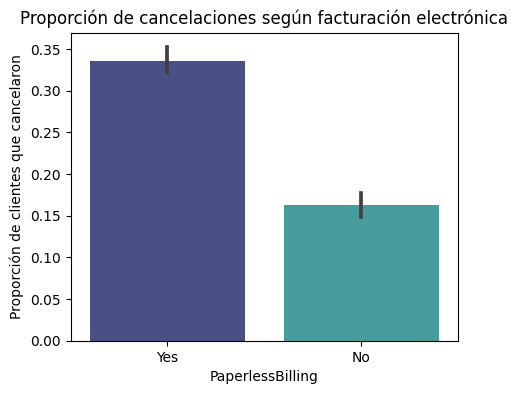

In [75]:

plt.figure(figsize=(5,4))
sns.barplot(x='PaperlessBilling', y='cancel', data=contract, palette='mako')
plt.title('Proporción de cancelaciones según facturación electrónica')
plt.ylabel('Proporción de clientes que cancelaron')
plt.show()


Los clientes que solicitan o piden facturación electrónica, son los que más cancelan. 

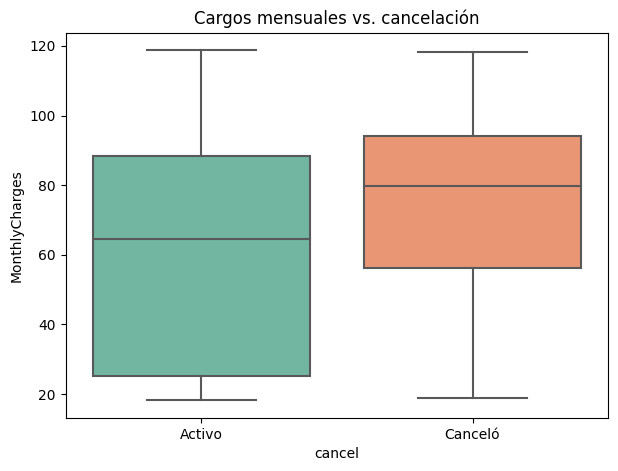

In [77]:
plt.figure(figsize=(7,5))
sns.boxplot(x='cancel', y='MonthlyCharges', data=contract, palette='Set2')
plt.title('Cargos mensuales vs. cancelación')
plt.xticks([0,1], ['Activo', 'Canceló'])
plt.show()

In [78]:
contract.groupby('cancel')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
cancel,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


Del grupo de tiene contrato mes a mes, el que canceló tiene una media más alta de pago que el que sigue activo (razón principal para cancelar los servicios 80 USD). 

<AxesSubplot:xlabel='gender', ylabel='cancel'>

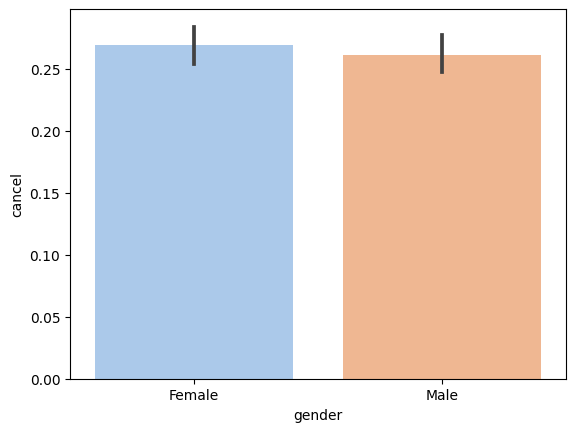

In [79]:
sns.barplot(x='gender', y='cancel', data=personal.merge(contract[['customerID','cancel']], on='customerID'), palette='pastel')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='cancel'>

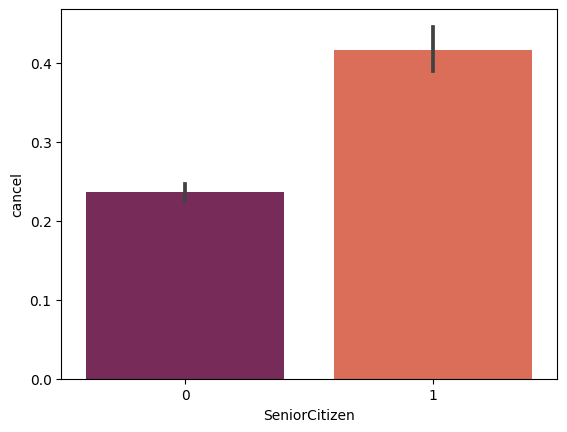

In [80]:
sns.barplot(x='SeniorCitizen', y='cancel', data=personal.merge(contract[['customerID','cancel']], on='customerID'), palette='rocket')

<AxesSubplot:xlabel='Partner', ylabel='cancel'>

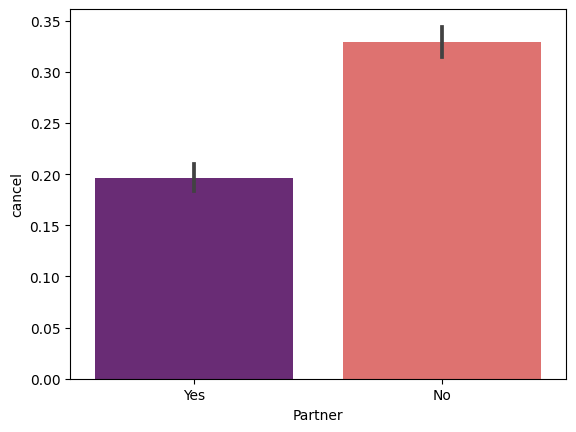

In [81]:
sns.barplot(x='Partner', y='cancel', data=personal.merge(contract[['customerID','cancel']], on='customerID'), palette='magma')

<AxesSubplot:xlabel='Dependents', ylabel='cancel'>

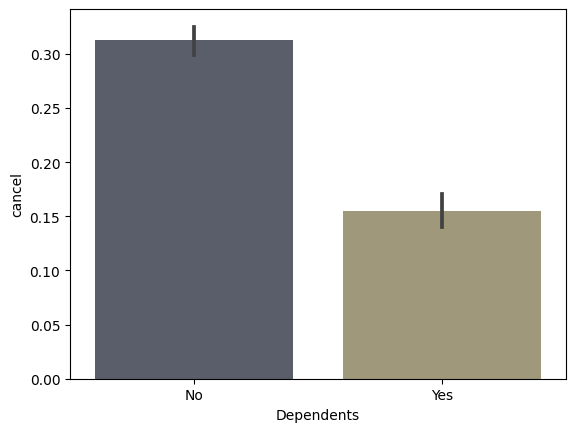

In [82]:
sns.barplot(x='Dependents', y='cancel', data=personal.merge(contract[['customerID','cancel']], on='customerID'), palette='cividis')

<AxesSubplot:xlabel='Partner', ylabel='count'>

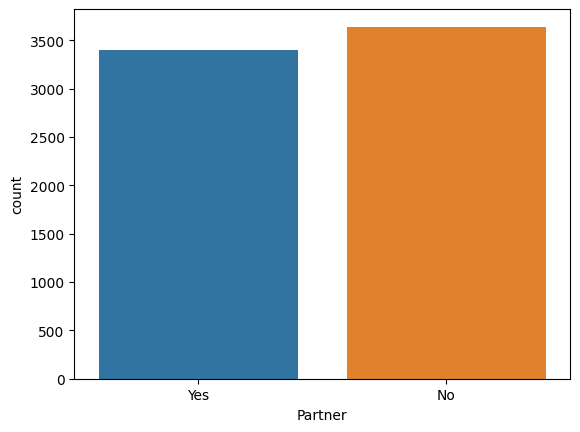

In [83]:
sns.countplot(x='Partner', data=personal)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

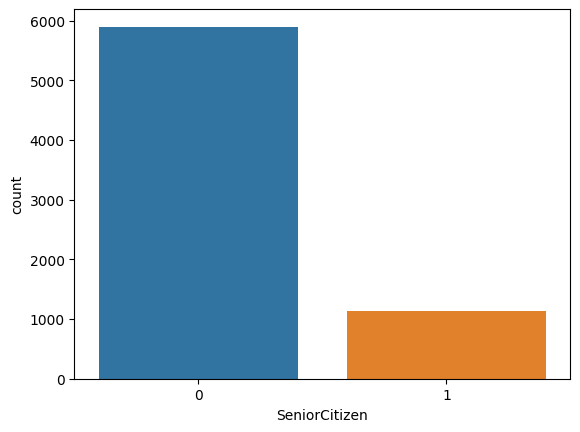

In [84]:
sns.countplot(x='SeniorCitizen', data=personal)

Frente al género, la proporción de cancelación entre hombres y mujeres es la misma (cercano al 25%), por lo que no habría alguna preferencia clara para el modelo futuro. Por otro lado, las personas senior si son las más propensas a cancelar; la personas con "partner" no cancelan tanto como las que están solas, y las personas dependientes (que tienen personas a cargo) tienden a conservar los servicios.  


<AxesSubplot:xlabel='InternetService', ylabel='count'>

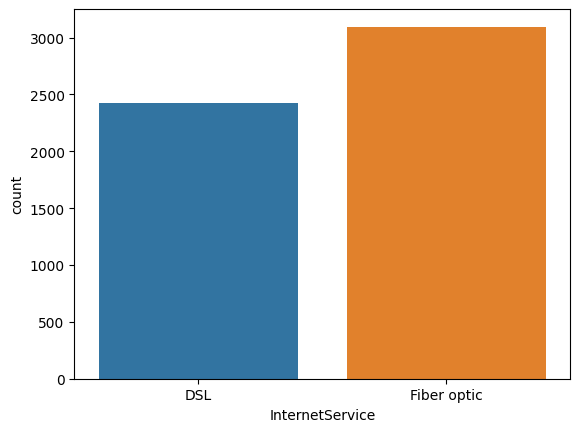

In [85]:
sns.countplot(x='InternetService', data=internet1)

Los clientes prefieren la fibra óptica que el DSL. 

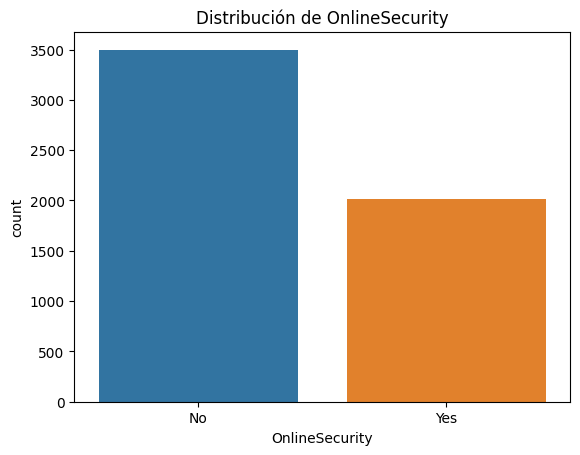

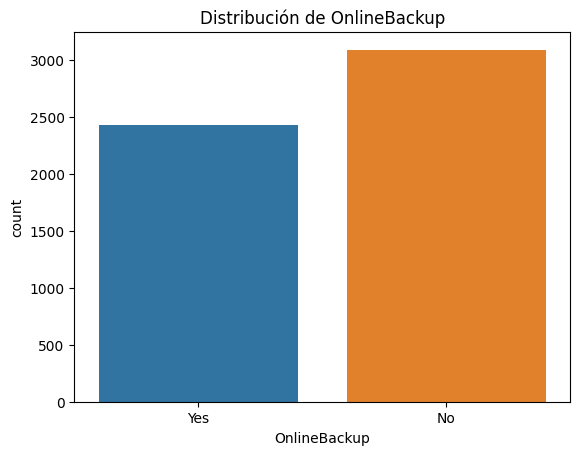

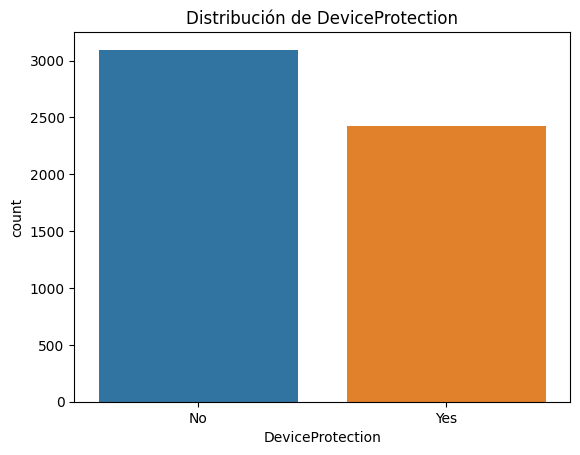

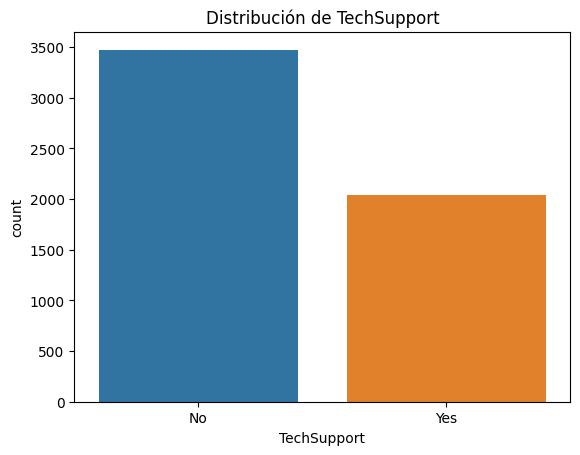

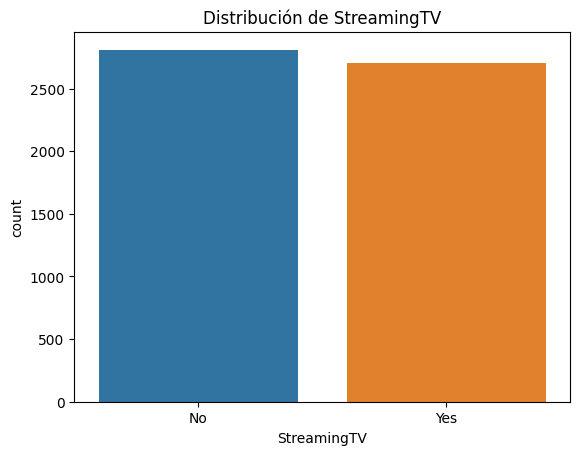

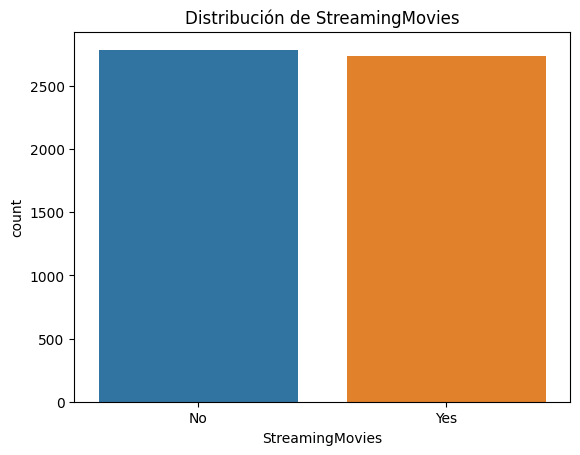

In [86]:
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    sns.countplot(x=col, data=internet1)
    plt.title(f'Distribución de {col}')
    plt.show()

La tendencia general es que los clientes no tengan servicios adicionales (puede que no los usen, que generan más gasto y que no se ofrezcan dentro del plan inicial). 

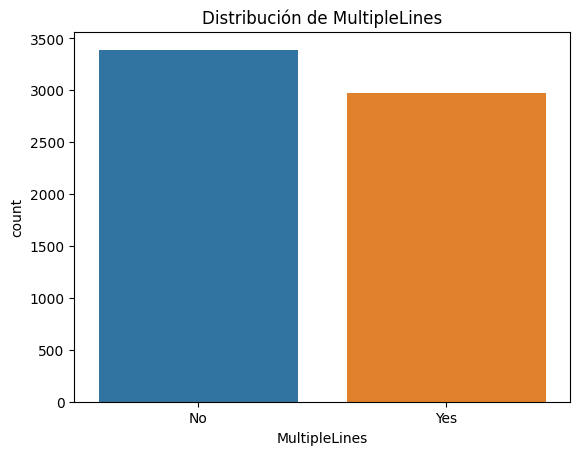

In [87]:
sns.countplot(x='MultipleLines', data=phone)
plt.title('Distribución de MultipleLines')
plt.show()

La mayoría de los clientes solo tiene una línea telefónica y no multiples. El tener multiples líneas, generaría mas gastos y por consiguiente mayor problabilidad de cancelación. 

## 5. Creación de la tabla para el modelado

Se realiza una la tabla para el modelo, uniendo las demás tablas. Se usará la columna "customer ID"

In [88]:
df = contract.merge(personal, on='customerID', how='left')
df = df.merge(internet1, on='customerID', how='left')
df = df.merge(phone, on='customerID', how='left')

In [89]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cancel,DurationDays,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,2148,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,0,3153,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,3488,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [90]:
df.info()           
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   cancel            7043 non-null   int64         
 9   DurationDays      7043 non-null   int64         
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

(7043, 22)

In [91]:
df.isnull().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
cancel                 0
DurationDays           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

En la integración de los dataframe, hay 5174 clientes siguen activos (0) y 1869 clientes tienen una fecha de cancelación (1)
Los 1526 de los servicios deben corresponder a los que no tienen esos servicio adicionales (sale de la resta de 7043 que es el total - 5517 que tiene internet). Se deben poner en colocar en "0" a las columnas de 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies'

In [92]:
internet_cols = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'MultipleLines']

for col in internet_cols:
    df[col] = df[col].fillna('No')

In [93]:
df.isnull().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
cancel                 0
DurationDays           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
dtype: int64

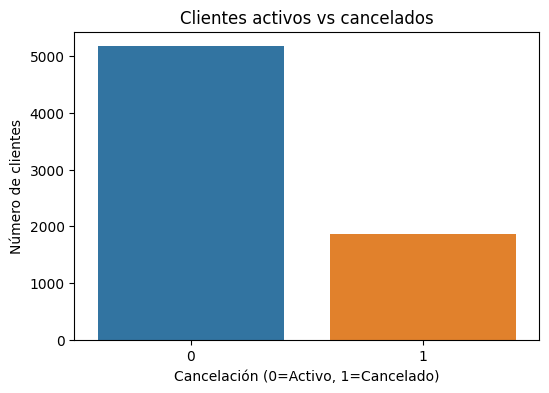

In [94]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cancel')
plt.title('Clientes activos vs cancelados')
plt.ylabel('Número de clientes')
plt.xlabel('Cancelación (0=Activo, 1=Cancelado)')
plt.show()

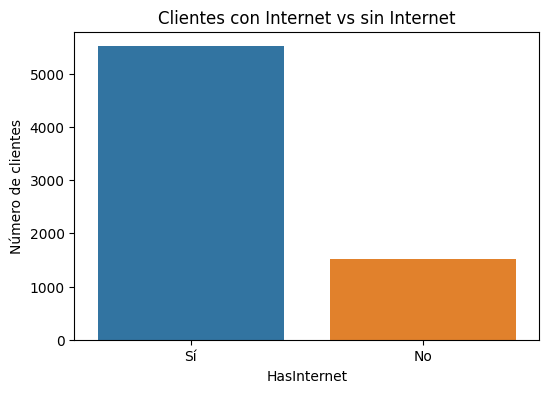

In [95]:
plt.figure(figsize=(6,4))
df['HasInternet'] = df['InternetService'].apply(lambda x: 'Sí' if x != 'No' else 'No')
sns.countplot(data=df, x='HasInternet')
plt.title('Clientes con Internet vs sin Internet')
plt.ylabel('Número de clientes')
plt.show()

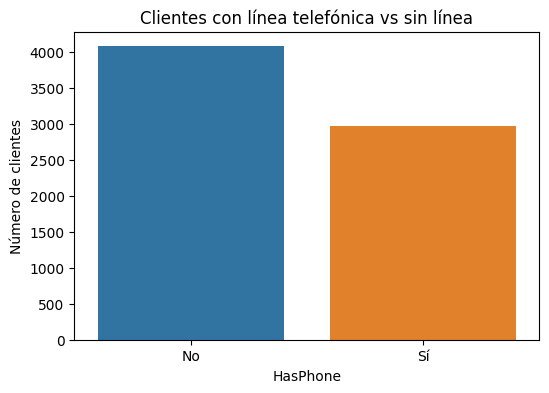

In [96]:
plt.figure(figsize=(6,4))
df['HasPhone'] = df['MultipleLines'].apply(lambda x: 'Sí' if x != 'No' else 'No')
sns.countplot(data=df, x='HasPhone')
plt.title('Clientes con línea telefónica vs sin línea')
plt.ylabel('Número de clientes')
plt.show()

La mayoría de los clientes tienen internet (más de 5000), tienen servicio de telefonía (más de 4000) 

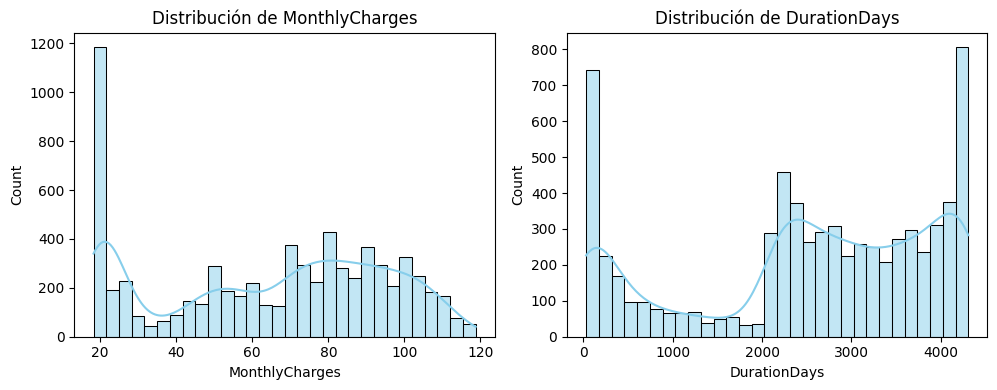

In [97]:
num_cols = ['MonthlyCharges','DurationDays']
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

La distribución del pago mensual, no está definido como una normal, sino quue presenta una distribución hacia la izquiera y también a la derecha con cargos de entre 20 - 70 y por otro lado, entre 80-100. Adicional, para la distribución de la duración de días en el contrato está sesgada a la derecha (entre 2000-4000 días que serían 5 y 11 años). 

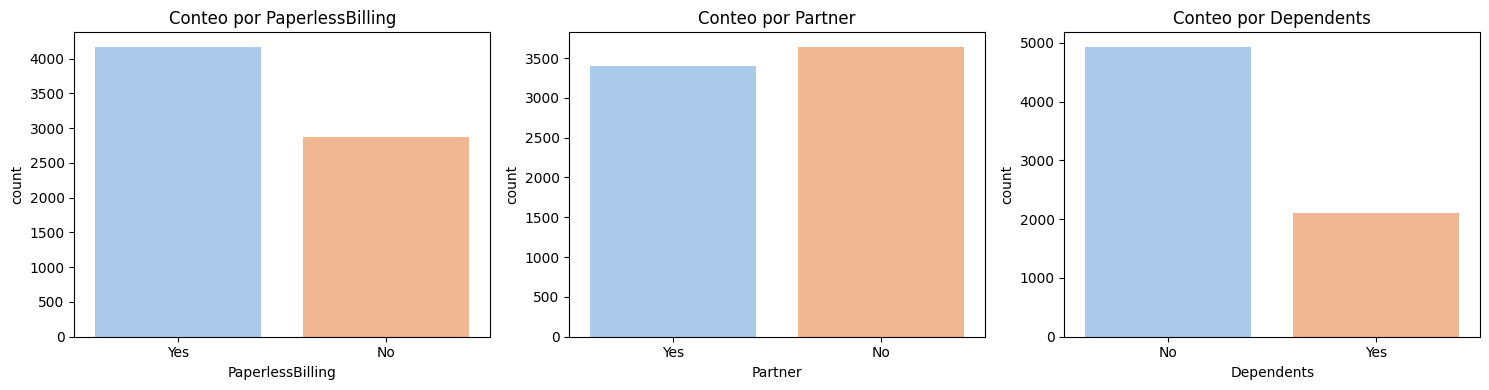

In [98]:

cat_bin = ['PaperlessBilling', 'Partner', 'Dependents']
plt.figure(figsize=(15, 4))
for i, col in enumerate(cat_bin):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Conteo por {col}')
plt.tight_layout()
plt.show()


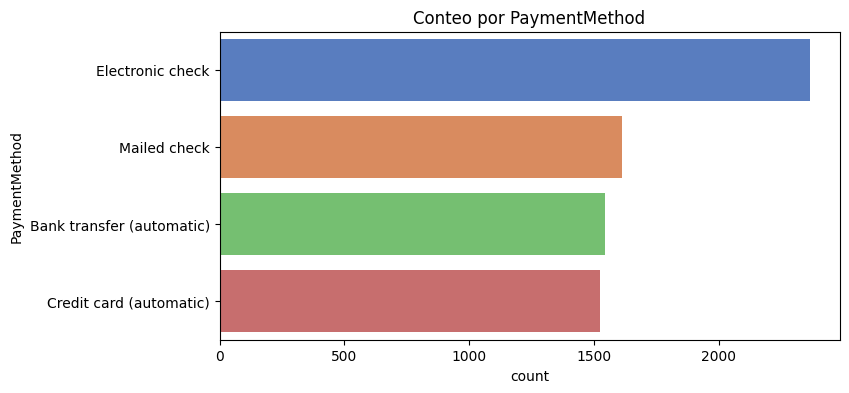

In [99]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['PaymentMethod'], palette='muted', order=df['PaymentMethod'].value_counts().index)
plt.title('Conteo por PaymentMethod')
plt.show()


La facturación electrónica sigue siendo la preferida por los clientes, la mayoría de los clientes indican que están solos y también no tienen personas a cargo. el método de pago por vía electrónica, sigue siendo el más elegido. 

## FASE 3. PREPARACION PARA EL MODELO Y DESARROLLO DEL MODELO

## 5.1 Preparación de las variables para el modelo

Pasaremos las variables a binario: 

In [100]:
df_services = df[['EndDate','InternetService','MultipleLines']].copy()
df_services['Cancel'] = df_services['EndDate'].notna().astype(int)
df_services['Internet'] = (df_services['InternetService'] != 'No').astype(int)
df_services['Phone'] = (df_services['MultipleLines'] != 'No').astype(int)


In [101]:
summary = pd.DataFrame({
    'Porcentaje': [
        df_services['Cancel'].mean(),
        df_services['Internet'].mean(),
        df_services['Phone'].mean()
    ]
}, index=['Cancelado','Tiene Internet','Tiene Línea'])

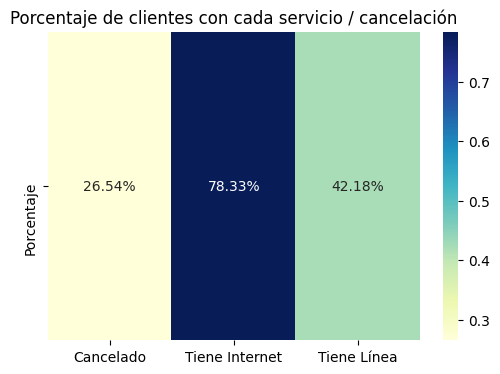

In [102]:

plt.figure(figsize=(6,4))
sns.heatmap(summary.T, annot=True, fmt=".2%", cmap='YlGnBu')
plt.title('Porcentaje de clientes con cada servicio / cancelación')
plt.show()


Acá se observa la relación de cada cliente en la cancelación: los que tenían internet cancelaron un 78%, mientras que los que tenían servicio de telefonía cancelaron un 42%

## 5.2 Revisión de correlación de las variables

Crear una copia para no tocar el df original y sacar las correlaciones entre las variables. 

In [103]:
df_corr = df.drop(columns=['customerID']).copy()

for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

corr = df_corr.corr()

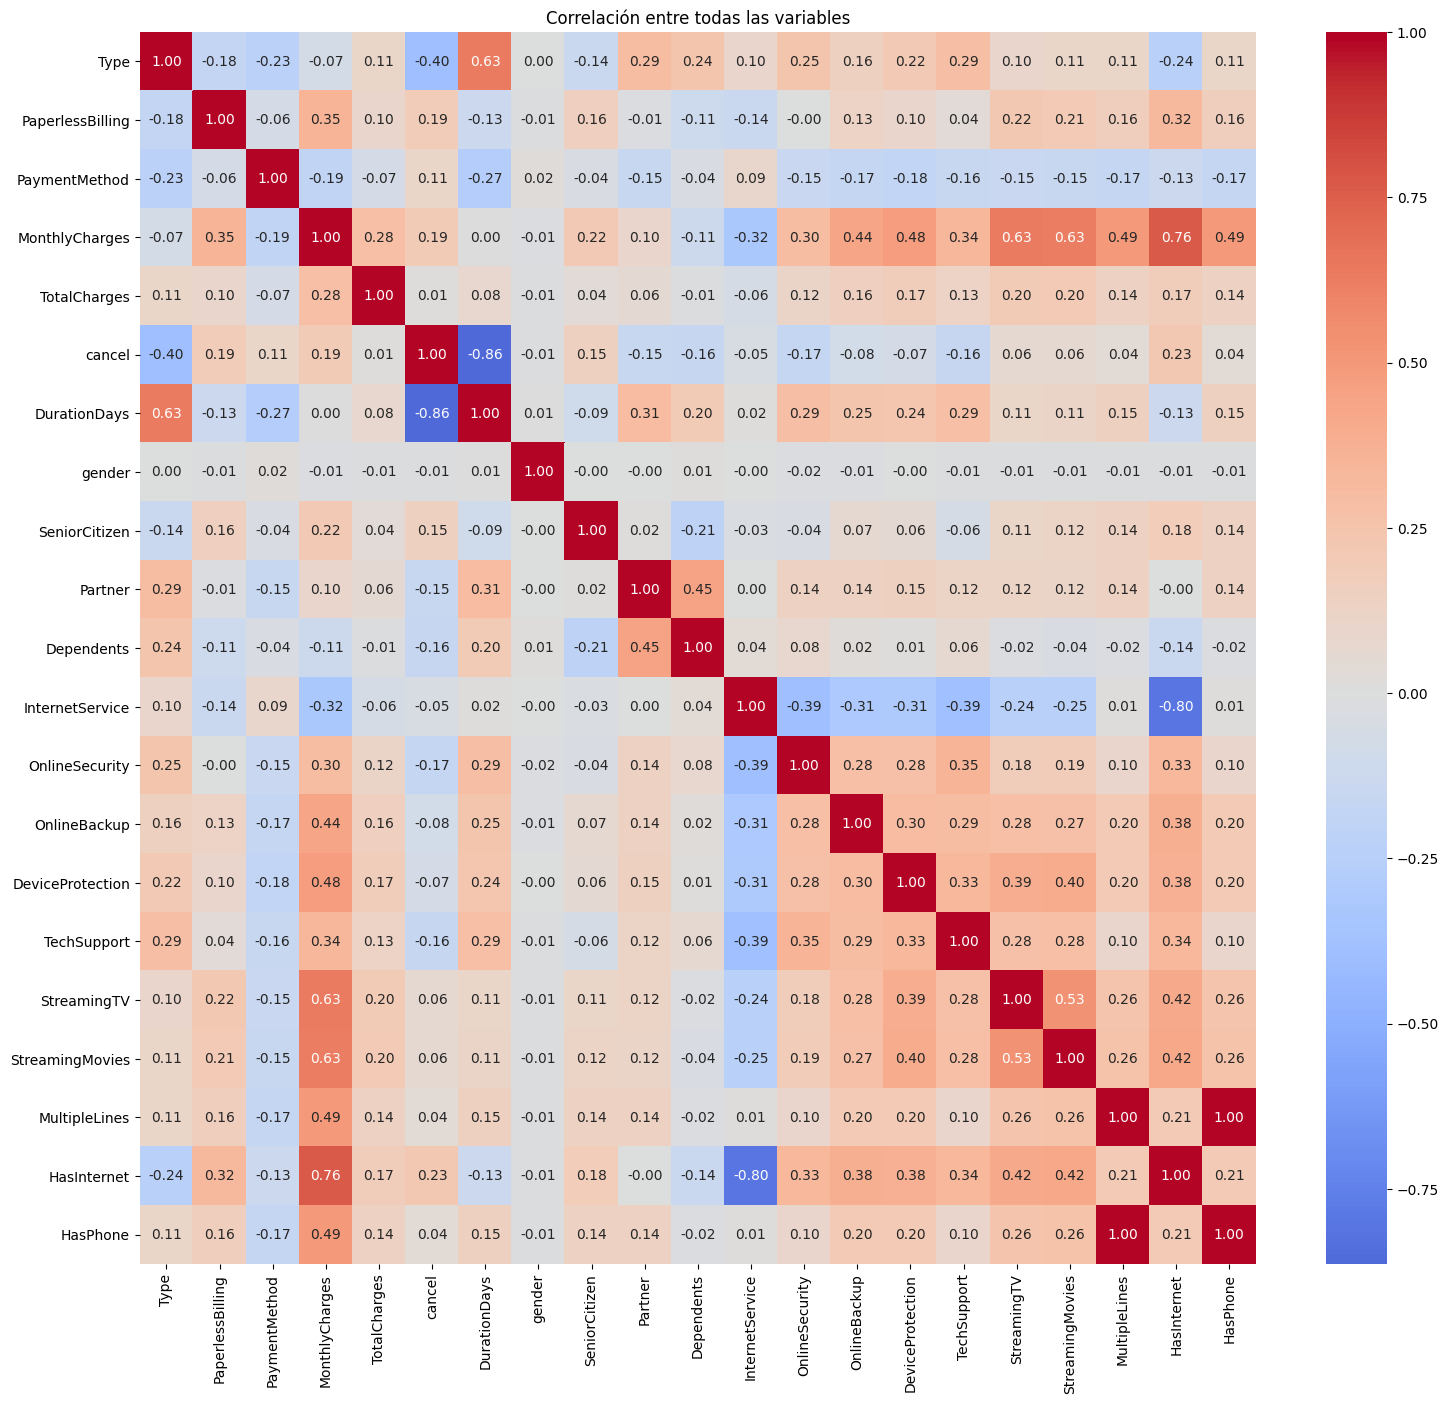

In [104]:
plt.figure(figsize=(18,16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlación entre todas las variables')
plt.show()

In [105]:
umbral = 0.8
altamente_corr = []

for i, col1 in enumerate(corr.columns):
    for j, col2 in enumerate(corr.columns):
        if i < j:  
            if abs(corr.loc[col1, col2]) > umbral:
                altamente_corr.append((col1, col2, corr.loc[col1, col2]))

altamente_corr_df = pd.DataFrame(altamente_corr, columns=['Variable1', 'Variable2', 'Correlacion'])
altamente_corr_df

,Variable1,Variable2,Correlacion
0,cancel,DurationDays,-0.863634
1,InternetService,HasInternet,-0.803477
2,MultipleLines,HasPhone,1.000000


Con este mapa de calor, se pueden eliminar las variables con alta correlación para que no afecte el modelo y los sesgue. En este caso, vemos que la columna de duración, has internet y has phone tienen elevadas correlaciones. Por ellos, se eliminarían del modelo. También se elimna la de "End data" y "begin data" ya que se tenía la columna "durationdays"

In [106]:
df_model = df.drop(columns=['EndDate','HasInternet','HasPhone', 'DurationDays'], errors='ignore')

In [107]:
for col in df_model.columns:
    if np.issubdtype(df_model[col].dtype, np.datetime64):
        df_model = df_model.drop(columns=[col])

## 6. Desarrollo del modelo

Seleccion de las variables: Variables numéricas y variables categóricas

In [108]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

cat_cols = df_model.drop(columns=['customerID','cancel'] + num_cols).columns.tolist()

Se convierten la variables numéricas a float

In [109]:
for col in num_cols:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')


Se colocan los "NaN" a las columnas. 

In [110]:
df_model[num_cols] = df_model[num_cols].fillna(df_model[num_cols].mean())

Se realiza el One-Hot Encoding para convertir variables categóricas en columnas numéricas

In [111]:
X_cat = pd.get_dummies(df_model[cat_cols], drop_first=True)
X_num = df_model[num_cols]

X = pd.concat([X_num, X_cat], axis=1)
y = df_model['cancel']

X = X.fillna(0)

print("Shape de X:", X.shape)

Shape de X: (7043, 21)


In [112]:
df_model = df_model.drop(columns=['BeginDate'], errors='ignore')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

In [114]:
num_cols = ['MonthlyCharges','TotalCharges']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

Se desarrolla el modelo inicial (Dummy) para tener un modelo base

In [115]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:,1]

print("Dummy Classifier:")
print("AUC-ROC:", roc_auc_score(y_test, y_proba_dummy))
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("F1-score:", f1_score(y_test, y_pred_dummy))
print("")

Dummy Classifier:
AUC-ROC: 0.5
Accuracy: 0.73450070989115
F1-score: 0.0



Dummy Classifier:
AUC-ROC: 0.5
Accuracy: 0.73450070989115
F1-score: 0.0

Se desarrollan 4 modelos: Regresión logística, Random Forest, Gradiente y KNN. 

In [116]:

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier()
}

In [117]:
resultados = []

for nombre, modelo in modelos.items():
    
    if nombre in ["Logistic Regression","KNN"]:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:,1]
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:,1]
    
    auc = roc_auc_score(y_test, y_proba)
     
    resultados.append({
        "Modelo": nombre,
        "ROC-AUC": auc,
                
    })

resultados_df = pd.DataFrame(resultados).sort_values(by="ROC-AUC", ascending=False)
print(resultados_df)

                Modelo   ROC-AUC
1        Random Forest  0.838788
0  Logistic Regression  0.835957
2    Gradient Boosting  0.818654
3                  KNN  0.764665


Vamos a mejorar los parámetros del modelo de Random Forest que es el AUC que dió mas cerca al esperado: 0.838

In [59]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

mejor_params = grid.best_params_
mejor_modelo = grid.best_estimator_
mejor_auc = roc_auc_score(y_test, mejor_modelo.predict_proba(X_test)[:, 1])

print("\n Mejores parámetros encontrados:")
print(mejor_params)

print("\n ROC-AUC del mejor modelo en test:")
print(mejor_auc)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

El AUC sigue siendo similar al obtenido anteriormente. 

Se usaran dos modelos más, basados en gradiente Boosting (árboles de decisión), para comparar con el modelo de bosque aleatorio: LightGBM y XGBoost.

- LightGBM: 

In [60]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 31
}

bst = lgb.train(
    params,
    train_data,
    num_boost_round=500
)

y_proba = bst.predict(X_test)

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC LightGBM:", auc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.505625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[C

- XGBoost:

In [118]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 500
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=[(dtest, 'test')],
    verbose_eval=50
)

y_proba = bst.predict(dtest)  

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC XGBoost:", auc)

[0]	test-auc:0.81065
[50]	test-auc:0.84271
[100]	test-auc:0.83983
[150]	test-auc:0.83649
[200]	test-auc:0.83400
[250]	test-auc:0.83092
[300]	test-auc:0.82950
[350]	test-auc:0.82685
[400]	test-auc:0.82471
[450]	test-auc:0.82274
[499]	test-auc:0.82110
ROC-AUC XGBoost: 0.8211054220188544


Mejora del los hiperparámetros del XGBoost (muestrando un pico cercano al 0.84)

In [120]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.85,
    gamma=0.1,
    n_estimators=2000,
    use_label_encoder=False,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=20,
    verbose=False
)

y_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC XGBoost optimizado:", auc)

ROC-AUC XGBoost optimizado: 0.8441893158388003


Conclusión preliminar
- Los primero modelos presentaron AUC 0.764 - 0.843, siendo el que presentó mejor desempeño el de Random Forest, con un AUC cercano a 0.843, y por consiguiente uno de los más adecuados para este proyecto de acuerdo a lo solicitado.  
- Probando con mejores modelos como el lightGBM y el XGBoost, y mejorando los hiperparámetros de este último, se obtuvieron valores muy similares al 0.843.
- Con esto, concluimos que el modelo, sea por XGBoost o Bosque mejorado, distingue correctamente clientes que cancelan el plan en un 84,4% de los casos)  